In [1]:
import pandas as pd

train =pd.read_csv('/content/train_data10.csv')
train.head()

,Unnamed: 0,Sentence,Target
0,659,Appellant had stated to the officers that she ...,Invalid
1,3456,We shall discuss the facts more fully in conne...,Others
2,2043,"â€œPerjury is a false statement, either writte...",Invalid
3,3344,The offense is felony theft by false pretext; ...,Issue
4,3231,Numerous contentions urging the commission of ...,Issue


In [2]:
train['Target']=train['Target'].replace(['Rule/Law/holding'],'Rule/Law/Holding')
train['Target']=train['Target'].replace(['Others'],'Invalid')
train['Target'].unique()

array(['Invalid', 'Issue', 'Analysis', 'Facts', 'Conclusion',
       'Rule/Law/Holding'], dtype=object)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Class=3, n=550 (15.823%)
Class=4, n=218 (6.272%)
Class=0, n=520 (14.960%)
Class=2, n=1769 (50.892%)
Class=1, n=179 (5.150%)
Class=5, n=240 (6.904%)


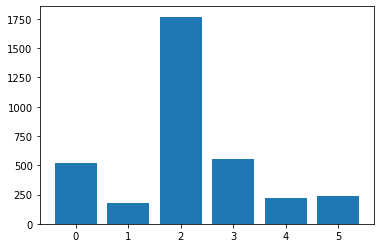

In [3]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
data = train.values


# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# label encode the target variable
y = LabelEncoder().fit_transform(y)

# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [4]:
#cleaning
import nltk
import re
import string
nltk.download('stopwords')
nltk.download('wordnet')
stopword=nltk.corpus.stopwords.words('english')
from nltk.stem import WordNetLemmatizer
wl= WordNetLemmatizer()

def clean_text(text):
  text="".join([word.lower() for word in text if word not in string.punctuation])
  tokens = re.split('\W+',text)
  text = [wl.lemmatize(word) for word in tokens if word not in stopword]
  return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer = clean_text)
X_tfidf = tfidf_vect.fit_transform(train['Sentence'])
print(X_tfidf.shape)

(3476, 6403)


In [6]:
from sklearn.externals import joblib
joblib.dump(tfidf_vect, '/content/tf_idf.pkl')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['/content/tf_idf.pkl']

In [7]:
X_tfidf_df=pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.columns=tfidf_vect.get_feature_names()
X_tfidf_df.head()

,,015,1,10,100,1000,10000,100000,10000000,1006,1008,1008a,100x22,101,1013,1015,1026,104,1042,1044,105,1065,107,107c,1081,1084,1097,10a,11,110,1102,111,1116,112,1120,113,1130,113637,1140,114073,...,œswayingâ,œswollenâ,œtesting,œtestâ,œthat,œthatâ,œthe,œthere,œthey,œthick,œthis,œthumbusterâ,œto,œtwo,œtwoâ,œunlawfully,œunlawfullyâ,œupon,œvagrancyâ,œvalue,œvery,œvisited,œwaived,œwalked,œwas,œwater,œwe,œwell,œwhat,œwhen,œwhere,œwhile,œwhipped,œwhoever,œwilfullyâ,œwillfullyâ,œyesâ,œyou,œyour,œyâ
0,0.136591,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Class=Invalid, n=1769 (16.667%)
Class=Issue, n=1769 (16.667%)
Class=Analysis, n=1769 (16.667%)
Class=Facts, n=1769 (16.667%)
Class=Conclusion, n=1769 (16.667%)
Class=Rule/Law/Holding, n=1769 (16.667%)


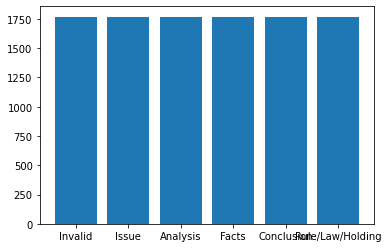

In [8]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=777,k_neighbors=5)
X, y = oversample.fit_resample(X_tfidf_df, train['Target'])
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [9]:
#using smote and stochastic gradient boosting
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


X_train, x_test, Y_train, y_test = train_test_split(X,y,test_size=0.27,random_state=2)
sgd = SGDClassifier(max_iter=1000, tol=1e-3)
sgd.fit(X_train, Y_train)
pred_sgd = sgd.predict(x_test)
print('Accuracy %s' % accuracy_score(pred_sgd,y_test))
print(classification_report(y_test,pred_sgd))

Accuracy 0.9200976971388695
                  precision    recall  f1-score   support

        Analysis       0.90      0.93      0.92       469
      Conclusion       0.94      0.98      0.96       474
           Facts       0.95      0.70      0.80       474
         Invalid       0.84      0.92      0.88       455
           Issue       0.96      0.99      0.98       495
Rule/Law/Holding       0.94      1.00      0.97       499

        accuracy                           0.92      2866
       macro avg       0.92      0.92      0.92      2866
    weighted avg       0.92      0.92      0.92      2866



In [10]:
unlabel = pd.read_csv(r'/content/Unlabeled_data.csv')
unlabel.head()

,Unnamed: 0,text,Complete
0,0,No motion for rehearing filed.,1
1,1,— Relator is under accusation of killing her h...,1
2,2,From an order of the District Judge of the 39t...,1
3,3,Relator and her husband had been married for a...,1
4,4,The evidence indicates that their family relat...,1


In [11]:
del unlabel['Complete']

In [12]:
del unlabel['Unnamed: 0']

In [13]:
unlabel.head()

,text
0,No motion for rehearing filed.
1,— Relator is under accusation of killing her h...
2,From an order of the District Judge of the 39t...
3,Relator and her husband had been married for a...
4,The evidence indicates that their family relat...


In [14]:
unlabel['text'] = unlabel['text'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
unlabel['text'] = unlabel['text'].str.replace('[^\w\s]','')
from nltk.corpus import stopwords
words = stopwords.words('english')
unlabel['text'] = unlabel['text'].apply(lambda x: " ".join(x for x in x.split() if x not in words))


In [15]:
from textblob import TextBlob
from textblob import Word
nltk.download('wordnet')
nltk.download('punkt')
unlabel['text'] = unlabel['text'].apply(lambda x: TextBlob(x).words)
unlabel['text'] = unlabel['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x]))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [16]:
unlabel.head()

,text
0,motion rehearing filed
1,relator accusation killing husband virgil clark
2,order district judge 39th judicial district re...
3,relator husband married number year
4,evidence indicates family relation always plea...


In [17]:
len(unlabel)

537703

In [18]:
unlabel_1 = unlabel.loc[:100000]
print("length of unlabel_1",len(unlabel_1))
unlabel_2 = unlabel.loc[100001:200000]
print("length of unlabel_2",len(unlabel_2))
unlabel_3 = unlabel.loc[200001:300000]
print("length of unlabel_3",len(unlabel_3))
unlabel_4 = unlabel.loc[300001:400000]
print("length of unlabel_4",len(unlabel_4))
unlabel_5 = unlabel.loc[400001:]
print("length of unlabel_5",len(unlabel_5))

length of unlabel_1 100001
length of unlabel_2 100000
length of unlabel_3 100000
length of unlabel_4 100000
length of unlabel_5 137702


In [19]:
x_un1 = tfidf_vect.transform(unlabel_1['text'])


In [20]:
x_un1.shape

(100001, 6403)

In [21]:
pred_unlabel_1 = sgd.predict(x_un1)

In [22]:
unlabel_1['Target']=pred_unlabel_1
unlabel_1.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,text,Target
0,motion rehearing filed,Invalid
1,relator accusation killing husband virgil clark,Facts
2,order district judge 39th judicial district re...,Facts
3,relator husband married number year,Facts
4,evidence indicates family relation always plea...,Facts


In [23]:
train = train.rename(columns={'Sentence':'text'})
train.head()

,Unnamed: 0,text,Target
0,659,Appellant had stated to the officers that she ...,Invalid
1,3456,We shall discuss the facts more fully in conne...,Invalid
2,2043,"â€œPerjury is a false statement, either writte...",Invalid
3,3344,The offense is felony theft by false pretext; ...,Issue
4,3231,Numerous contentions urging the commission of ...,Issue


In [24]:
frame_1 = [train,unlabel_1]
train_1 = pd.concat(frame_1)
len(train_1)

103477

In [25]:
x_train_1 = tfidf_vect.transform(train_1['text'])
x_train_1.shape

(103477, 6403)

In [26]:
X, y = oversample.fit_resample(x_train_1, train_1['Target'])
X_train, x_test, Y_train, y_test = train_test_split(X,y,test_size=0.27,random_state=2)
sgd = SGDClassifier(max_iter=1000, tol=1e-3)
sgd.fit(X_train, Y_train)
pred_sgd = sgd.predict(x_test)
print('Accuracy %s' % accuracy_score(pred_sgd,y_test))
print(classification_report(y_test,pred_sgd))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Accuracy 0.887087644265543
                  precision    recall  f1-score   support

        Analysis       0.88      0.85      0.87     10669
      Conclusion       0.93      0.93      0.93     10569
           Facts       0.91      0.80      0.85     10589
         Invalid       0.88      0.84      0.86     10588
           Issue       0.88      0.93      0.90     10673
Rule/Law/Holding       0.85      0.96      0.90     10510

        accuracy                           0.89     63598
       macro avg       0.89      0.89      0.89     63598
    weighted avg       0.89      0.89      0.89     63598



In [27]:
x_un2 = tfidf_vect.transform(unlabel_2['text'])
x_un2.shape

(100000, 6403)

In [28]:
pred_unlabel_2 = sgd.predict(x_un2)

In [29]:
unlabel_2['Target']=pred_unlabel_2
unlabel_2.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,text,Target
100001,responding conclusion regarding evidence annou...,Conclusion
100002,conviction transporting intoxicating liquor pu...,Rule/Law/Holding
100003,bill exception case filed late,Facts
100004,motion new trial overruled october 22 1927 ord...,Facts
100005,thereafter december 10th extension order made ...,Facts


In [30]:
frame_2 = [train_1,unlabel_2]
train_2 = pd.concat(frame_2)
len(train_2)

203477

In [31]:
x_train_2 = tfidf_vect.transform(train_2['text'])
x_train_2.shape

(203477, 6403)

In [32]:
X, y = oversample.fit_resample(x_train_2, train_2['Target'])
X_train, x_test, Y_train, y_test = train_test_split(X,y,test_size=0.27,random_state=2)
sgd = SGDClassifier(max_iter=1000, tol=1e-3)
sgd.fit(X_train, Y_train)
pred_sgd = sgd.predict(x_test)
print('Accuracy %s' % accuracy_score(pred_sgd,y_test))
print(classification_report(y_test,pred_sgd))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Accuracy 0.8985994059132357
                  precision    recall  f1-score   support

        Analysis       0.90      0.87      0.89     19549
      Conclusion       0.94      0.93      0.93     19414
           Facts       0.93      0.83      0.87     19211
         Invalid       0.90      0.86      0.88     19204
           Issue       0.88      0.94      0.91     19282
Rule/Law/Holding       0.86      0.96      0.91     19148

        accuracy                           0.90    115808
       macro avg       0.90      0.90      0.90    115808
    weighted avg       0.90      0.90      0.90    115808



In [33]:
x_un3 = tfidf_vect.transform(unlabel_3['text'])
x_un3.shape

(100000, 6403)

In [34]:
pred_unlabel_3 = sgd.predict(x_un3)

In [35]:
unlabel_3['Target']=pred_unlabel_3
unlabel_3.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,text,Target
200001,another man carrying clothes,Facts
200002,officer testified appellant several item cloth...,Invalid
200003,investigation followed report breaking entry a...,Facts
200004,appellant present,Facts
200005,warrant arrest issued officer went hotel waite...,Facts


In [36]:
frame_3 = [train_2,unlabel_3]
train_3 = pd.concat(frame_3)
len(train_3)

303477

In [37]:
x_train_3 = tfidf_vect.transform(train_3['text'])
x_train_3.shape

(303477, 6403)

In [38]:
X, y = oversample.fit_resample(x_train_3, train_3['Target'])
X_train, x_test, Y_train, y_test = train_test_split(X,y,test_size=0.27,random_state=2)
sgd = SGDClassifier(max_iter=1000, tol=1e-3)
sgd.fit(X_train, Y_train)
pred_sgd = sgd.predict(x_test)
print('Accuracy %s' % accuracy_score(pred_sgd,y_test))
print(classification_report(y_test,pred_sgd))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Accuracy 0.907030894703332
                  precision    recall  f1-score   support

        Analysis       0.91      0.88      0.90     27660
      Conclusion       0.94      0.94      0.94     27753
           Facts       0.94      0.84      0.89     27267
         Invalid       0.91      0.88      0.89     27480
           Issue       0.88      0.95      0.91     27290
Rule/Law/Holding       0.87      0.96      0.91     27465

        accuracy                           0.91    164915
       macro avg       0.91      0.91      0.91    164915
    weighted avg       0.91      0.91      0.91    164915



In [39]:
x_un4 = tfidf_vect.transform(unlabel_4['text'])
x_un4.shape


(100000, 6403)

In [40]:
pred_unlabel_4 = sgd.predict(x_un4)
unlabel_4['Target']=pred_unlabel_4
unlabel_4.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,text,Target
300001,statute final judgment appeal court lie senten...,Rule/Law/Holding
300002,sentence must pronounced term court judgment r...,Rule/Law/Holding
300003,court sentence defendant vacation,Invalid
300004,court adjourned authority case ceased notice a...,Rule/Law/Holding
300005,pronouncing sentence authorized vacation autho...,Rule/Law/Holding


In [41]:
frame_4 = [train_3,unlabel_4]
train_4 = pd.concat(frame_4)
len(train_4)

403477

In [42]:
x_train_4 = tfidf_vect.transform(train_4['text'])
x_train_4.shape

(403477, 6403)

In [43]:
X, y = oversample.fit_resample(x_train_4, train_4['Target'])
X_train, x_test, Y_train, y_test = train_test_split(X,y,test_size=0.27,random_state=2)
sgd = SGDClassifier(max_iter=1000, tol=1e-3)
sgd.fit(X_train, Y_train)
pred_sgd = sgd.predict(x_test)
print('Accuracy %s' % accuracy_score(pred_sgd,y_test))
print(classification_report(y_test,pred_sgd))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Accuracy 0.9107594847212206
                  precision    recall  f1-score   support

        Analysis       0.91      0.89      0.90     35482
      Conclusion       0.94      0.94      0.94     35256
           Facts       0.94      0.85      0.89     35348
         Invalid       0.92      0.88      0.90     35480
           Issue       0.89      0.94      0.92     35328
Rule/Law/Holding       0.87      0.96      0.91     35263

        accuracy                           0.91    212157
       macro avg       0.91      0.91      0.91    212157
    weighted avg       0.91      0.91      0.91    212157



In [44]:
x_un5 = tfidf_vect.transform(unlabel_5['text'])
x_un5.shape

(137702, 6403)

In [45]:
pred_unlabel_5 = sgd.predict(x_un5)
unlabel_5['Target']=pred_unlabel_5
unlabel_5.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,text,Target
400001,member federal reserve bank,Invalid
400002,opinion state case,Analysis
400003,conviction violating state cigarette law punis...,Rule/Law/Holding
400004,find record bill exception bringing forward co...,Analysis
400005,brief appellant complains lack testimony,Issue


In [46]:
frame_5 = [train_4,unlabel_5]
train_5 = pd.concat(frame_5)
len(train_5)

541179

In [47]:
x_train_5 = tfidf_vect.transform(train_5['text'])
x_train_5.shape

(541179, 6403)

In [48]:
X, y = oversample.fit_resample(x_train_5, train_5['Target'])
X_train, x_test, Y_train, y_test = train_test_split(X,y,test_size=0.27,random_state=2)
sgd = SGDClassifier(max_iter=1000, tol=1e-3)
sgd.fit(X_train, Y_train)
pred_sgd = sgd.predict(x_test)
print('Accuracy %s' % accuracy_score(pred_sgd,y_test))
print(classification_report(y_test,pred_sgd))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Accuracy 0.9170393365751998
                  precision    recall  f1-score   support

        Analysis       0.92      0.90      0.91     46107
      Conclusion       0.94      0.95      0.95     46025
           Facts       0.95      0.86      0.90     46022
         Invalid       0.92      0.89      0.91     46032
           Issue       0.89      0.95      0.92     46245
Rule/Law/Holding       0.88      0.96      0.92     45953

        accuracy                           0.92    276384
       macro avg       0.92      0.92      0.92    276384
    weighted avg       0.92      0.92      0.92    276384



In [49]:
df = pd.read_csv('/content/test_data.csv')

df['Target']=df['Target'].replace(['Rule/Law/holding'],'Rule/Law/Holding')
df['Target']=df['Target'].replace(['Others'],'Invalid')

df['Sentence'] = df['Sentence'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
df['Sentence'] = df['Sentence'].str.replace('[^\w\s]','')
from nltk.corpus import stopwords
words = stopwords.words('english')
df['Sentence'] = df['Sentence'].apply(lambda x: " ".join(x for x in x.split() if x not in words))

from textblob import TextBlob
from textblob import Word
nltk.download('wordnet')
nltk.download('punkt')
df['Sentence'] = df['Sentence'].apply(lambda x: TextBlob(x).words)
df['Sentence'] = df['Sentence'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x]))

final_test = tfidf_vect.transform(df['Sentence'])

pred_sgd_final = sgd.predict(final_test)
print('Accuracy %s' % accuracy_score(pred_sgd_final,df['Target']))
print(classification_report(df['Target'],pred_sgd_final))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Accuracy 0.508637236084453
                  precision    recall  f1-score   support

        Analysis       0.45      0.38      0.41        77
      Conclusion       0.41      0.81      0.55        26
           Facts       0.82      0.51      0.63       267
         Invalid       0.34      0.45      0.39        83
           Issue       0.26      0.41      0.32        34
Rule/Law/Holding       0.36      0.79      0.50        34

        accuracy                           0.51       521
       macro avg       0.44      0.56      0.46       521
    weighted avg       0.60      0.51      0.53       521

